In [1]:
import pandas as pd

In [2]:
# get the constallation name abbreviations, to limit variable stars to sensible names
def load_const_file(const_file):
#const_file = 'constellation_names.txt'
    f_const = open(const_file)
    line = ' '
    const_abbr = []
    while line != '':
        line = f_const.readline()
        const_abbr.append(line.split('\t')[-1].replace('\n',''))
    const_abbr = const_abbr[2:]
    f_const.close()
    const_abbr_low = [ const.lower() for const in const_abbr ]
    return const_abbr_low

In [3]:
in_file = '/home/john/astro/variable_star_data/baa/all_star_summary.csv'

In [4]:
# read in BAA variable star summary data as a Panda Data Frame
vsdb_full = pd.read_csv(in_file)
vsdb_full.head()

,Variable Star,Number of Observations,Number of Observers,First Observation JD / UT,Latest Observation JD / UT,Maximum Magnitude,Minimum Magnitude,Range
0,0531+00,2,1,2448216.495000 20 Nov 1990 23:52:48.000000,2449391.448000 7 Feb 1994 22:45:07.200000,9.9,11.3,1.4
1,0545+46,2,1,2447905.255000 13 Jan 1990 18:07:12.000000,2449393.452000 9 Feb 1994 22:50:52.800000,11.3,11.9,0.6
2,0643-1645 CMA,11,1,2448631.518700 10 Jan 1992 00:26:55.680000,2448692.366600 10 Mar 1992 20:47:54.240000,11.8,12.0,0.2
3,128 COMP STAR,1,1,2453919.482600 2 Jul 2006 23:34:56.640000,2453919.482600 2 Jul 2006 23:34:56.640000,12.6,12.6,0.0
4,1910+47,2,1,2448477.506000 9 Aug 1991 00:08:38.400000,2449719.306000 1 Jan 1995 19:20:38.400000,11.0,11.8,0.8


In [5]:
vsdb_full.describe()

,Number of Observations,Number of Observers,Maximum Magnitude,Minimum Magnitude,Range
count,2645.000000,2645.000000,2645.000000,2645.000000,2645.000000
mean,904.272968,9.827977,9.882658,11.994442,2.111784
std,3113.952786,25.811231,2.991841,3.413102,2.315482
min,1.000000,1.000000,-0.600000,1.800000,0.000000
25%,2.000000,1.000000,7.600000,9.400000,0.100000
50%,22.000000,1.000000,10.100000,11.900000,1.360000
75%,298.000000,4.000000,12.000000,14.800000,3.300000
max,59231.000000,302.000000,19.000000,21.000000,17.200000


array([[<AxesSubplot: title={'center': 'Number of Observations'}>]],
      dtype=object)

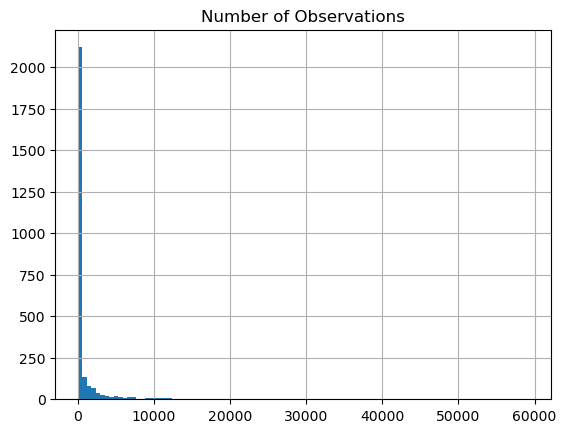

In [6]:
vsdb_full.hist('Number of Observations', bins=100)

In [7]:
# can also call describe() on a Series object
vsdb_full['Maximum Magnitude'].describe()

count    2645.000000
mean        9.882658
std         2.991841
min        -0.600000
25%         7.600000
50%        10.100000
75%        12.000000
max        19.000000
Name: Maximum Magnitude, dtype: float64

In [8]:
vsdb_full[['Variable Star', 'Number of Observations', 'Number of Observers']].sort_values(by='Number of Observations', ascending=False).head(30)

,Variable Star,Number of Observations,Number of Observers
1108,R CRB,59231,302
1466,SS CYG,52363,194
1463,SS AUR,34044,146
2615,Z CAM,31048,97
2472,W CYG,29928,230
290,CH CYG,28255,167
1139,R SCT,28171,237
1740,U GEM,25596,183
1272,RX AND,24558,110
296,CHI CYG,24544,234


In [9]:
# create a pattern to search which is an OR of each element in const_abbr (i.e. any constallation abbreviation)
const_abbrev = load_const_file('constellation_names.txt')
pattern = '|'.join(const_abbrev)
# need to watch the trailing OR, which seems to cause everything to match
pattern = pattern[:-1]
print(pattern)

ant|aps|aqr|aql|ara|ari|aur|boo|cae|cam|cnc|cvn|cma|cmi|cap|car|cas|cen|cep|cet|cha|cir|col|com|cra|crb|crv|crt|cru|cyg|del|dor|dra|equ|eri|for|gem|gru|her|hor|hya|hyi|ind|lac|leo|lmi|lep|lib|lup|lyn|lyr|men|mic|mon|mus|nor|oct|oph|ori|pav|peg|per|phe|pic|psc|psa|pup|pyx|ret|sge|sgr|sco|scl|sct|ser|sex|tau|tel|tri|tra|tuc|uma|umi|vel|vir|vol|vul


In [10]:
# I only want the stars where there are two fields in the name (e.g. 'TX Dra')
vsdb_allconst = vsdb_full
vsdb_allconst['Valid_nFields'] = vsdb_allconst['Variable Star'].str.count(' ')

#remove rows which don't have 1 nFields
vsdb_allconst.drop(vsdb_allconst[vsdb_allconst.Valid_nFields != 1].index, inplace=True)

# set the second field to be a 'Constellation' description.  Needs to be lower case to match pattern, above.
vs_const = vsdb_allconst['Variable Star'].str.split(expand=True)
vsdb_allconst['VS Constellation'] = vs_const[1].str.lower()

In [11]:
# check whether str.contains is working...
vsdb_allconst['VS Constellation'].str.contains(pattern)==True

2        True
5       False
6       False
7        True
9        True
        ...  
2640     True
2641     True
2642     True
2643     True
2644     True
Name: VS Constellation, Length: 2559, dtype: bool

In [12]:
# drop all rows where the conditional statement 
vsdb_allconst.drop(vsdb_allconst[vsdb_allconst['VS Constellation'].str.contains(pattern)==False].index, inplace=True)
vsdb_allconst.head()

,Variable Star,Number of Observations,Number of Observers,First Observation JD / UT,Latest Observation JD / UT,Maximum Magnitude,Minimum Magnitude,Range,Valid_nFields,VS Constellation
2,0643-1645 CMA,11,1,2448631.518700 10 Jan 1992 00:26:55.680000,2448692.366600 10 Mar 1992 20:47:54.240000,11.8,12.0,0.2,1,cma
7,21 PSC,2,1,2443789.414000 7 Oct 1978 21:56:09.600000,2443818.390000 5 Nov 1978 21:21:36.000000,5.2,5.3,0.1,1,psc
9,3 CET,7,1,2410283.500000 12 Jan 1887 00:00:00.000000,2410624.500000 19 Dec 1887 00:00:00.000000,5.1,5.2,0.1,1,cet
21,45 DRA,1,1,2452173.277800 20 Sep 2001 18:40:01.920000,2452173.277800 20 Sep 2001 18:40:01.920000,7.9,7.9,0.0,1,dra
24,51 CAS,5,1,2453738.262500 2 Jan 2006 18:18:00.000000,2454023.235400 14 Oct 2006 17:38:58.560000,7.2,7.4,0.2,1,cas


In [13]:
# vsdb, after initial filter on valid star name (two fields, contains a constellation abbreviation)
vsdb_allconst.describe()

,Number of Observations,Number of Observers,Maximum Magnitude,Minimum Magnitude,Range,Valid_nFields
count,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000,2157.0
mean,1021.777932,10.982383,9.598873,11.771966,2.173092,1.0
std,3361.628004,27.893377,2.901859,3.405555,2.368961,0.0
min,1.000000,1.000000,-0.600000,1.800000,0.000000,1.0
25%,2.000000,1.000000,7.400000,9.100000,0.100000,1.0
50%,21.000000,1.000000,9.900000,11.400000,1.400000,1.0
75%,363.000000,5.000000,11.500000,14.500000,3.480000,1.0
max,59231.000000,302.000000,18.900000,21.000000,17.200000,1.0


In [14]:
vsdb_allconst[['VS Constellation']].value_counts()

VS Constellation
cyg                 221
cas                 125
her                 107
aql                 101
per                  88
                   ... 
col                   1
cas-n                 1
ret                   1
cas-mid               1
cas-ne                1
Length: 92, dtype: int64

In [15]:
# slicing via []
vsdb_allconst[vsdb_allconst['VS Constellation']=='cyg']

,Variable Star,Number of Observations,Number of Observers,First Observation JD / UT,Latest Observation JD / UT,Maximum Magnitude,Minimum Magnitude,Range,Valid_nFields,VS Constellation
32,AA Cyg,4,1,2456091.328500 12 Jun 2012 19:53:02.400000,2456122.313900 13 Jul 2012 19:32:00.960000,8.60,9.0,0.40,1,cyg
37,AB CYG,37,2,2456863.535000 25 Jul 2014 00:50:24.000000,2458456.335400 3 Dec 2018 20:02:58.560000,8.40,9.0,0.60,1,cyg
58,AF CYG,12405,121,2433142.631900 14 Aug 1949 03:09:56.160000,2459908.281000 24 Nov 2022 18:44:38.400000,5.80,8.6,2.80,1,cyg
143,AT CYG,19,2,2448444.479000 6 Jul 1991 23:29:45.600000,2451163.299000 15 Dec 1998 19:10:33.600000,11.60,14.2,2.60,1,cyg
146,AU CYG,22,2,2453117.588900 22 Apr 2004 02:08:00.960000,2456158.393700 18 Aug 2012 21:26:55.680000,9.00,15.0,6.00,1,cyg
...,...,...,...,...,...,...,...,...,...,...
2472,W CYG,29928,230,2411736.500000 4 Jan 1891 00:00:00.000000,2459908.285000 24 Nov 2022 18:50:24.000000,4.57,7.9,3.33,1,cyg
2505,WX CYG,2,2,2452639.259700 30 Dec 2002 18:13:58.080000,2455113.375000 8 Oct 2009 21:00:00.000000,10.60,10.8,0.20,1,cyg
2536,X CYG,49,4,2412726.500000 20 Sep 1893 00:00:00.000000,2454594.545100 8 May 2008 01:04:56.640000,4.40,9.0,4.60,1,cyg
2579,Y CYG,600,5,2412739.500000 3 Oct 1893 00:00:00.000000,2459158.301000 4 Nov 2020 19:13:26.400000,6.80,8.1,1.30,1,cyg


In [16]:
#  this conditional statement returns a pandas Series of booleans
vsdb_allconst['VS Constellation']=='cyg'

2       False
7       False
9       False
21      False
24      False
        ...  
2640    False
2641    False
2642    False
2643    False
2644    False
Name: VS Constellation, Length: 2157, dtype: bool

In [17]:
type(vsdb_allconst['VS Constellation']=='cyg')

pandas.core.series.Series

In [18]:
# check the dtype. Note the () are needed to prevent dtype operating on 'cyg'
(vsdb_allconst['VS Constellation']=='cyg').dtype

dtype('bool')

In [19]:
# slicing via loc
# this is equivalent (I think!) to 
# vsdb[vsdb['VS Constellation']=='cyg']
vsdb_allconst.loc[vsdb_allconst['VS Constellation']=='cyg']

,Variable Star,Number of Observations,Number of Observers,First Observation JD / UT,Latest Observation JD / UT,Maximum Magnitude,Minimum Magnitude,Range,Valid_nFields,VS Constellation
32,AA Cyg,4,1,2456091.328500 12 Jun 2012 19:53:02.400000,2456122.313900 13 Jul 2012 19:32:00.960000,8.60,9.0,0.40,1,cyg
37,AB CYG,37,2,2456863.535000 25 Jul 2014 00:50:24.000000,2458456.335400 3 Dec 2018 20:02:58.560000,8.40,9.0,0.60,1,cyg
58,AF CYG,12405,121,2433142.631900 14 Aug 1949 03:09:56.160000,2459908.281000 24 Nov 2022 18:44:38.400000,5.80,8.6,2.80,1,cyg
143,AT CYG,19,2,2448444.479000 6 Jul 1991 23:29:45.600000,2451163.299000 15 Dec 1998 19:10:33.600000,11.60,14.2,2.60,1,cyg
146,AU CYG,22,2,2453117.588900 22 Apr 2004 02:08:00.960000,2456158.393700 18 Aug 2012 21:26:55.680000,9.00,15.0,6.00,1,cyg
...,...,...,...,...,...,...,...,...,...,...
2472,W CYG,29928,230,2411736.500000 4 Jan 1891 00:00:00.000000,2459908.285000 24 Nov 2022 18:50:24.000000,4.57,7.9,3.33,1,cyg
2505,WX CYG,2,2,2452639.259700 30 Dec 2002 18:13:58.080000,2455113.375000 8 Oct 2009 21:00:00.000000,10.60,10.8,0.20,1,cyg
2536,X CYG,49,4,2412726.500000 20 Sep 1893 00:00:00.000000,2454594.545100 8 May 2008 01:04:56.640000,4.40,9.0,4.60,1,cyg
2579,Y CYG,600,5,2412739.500000 3 Oct 1893 00:00:00.000000,2459158.301000 4 Nov 2020 19:13:26.400000,6.80,8.1,1.30,1,cyg


In [20]:
vsdb_allconst[vsdb_allconst['VS Constellation']=='cyg'].sort_values(by='Number of Observations', ascending=False)

,Variable Star,Number of Observations,Number of Observers,First Observation JD / UT,Latest Observation JD / UT,Maximum Magnitude,Minimum Magnitude,Range,Valid_nFields,VS Constellation
1466,SS CYG,52363,194,2417226.380000 15 Jan 1906 21:07:12.000000,2459909.389300 25 Nov 2022 21:20:35.520000,7.50,14.20,6.70,1,cyg
2472,W CYG,29928,230,2411736.500000 4 Jan 1891 00:00:00.000000,2459908.285000 24 Nov 2022 18:50:24.000000,4.57,7.90,3.33,1,cyg
290,CH CYG,28255,167,2439863.300000 7 Jan 1968 19:12:00.000000,2459909.270000 25 Nov 2022 18:28:48.000000,5.04,10.70,5.66,1,cyg
296,CHI CYG,24544,234,2393957.500000 2 May 1842 00:00:00.000000,2459904.408000 20 Nov 2022 21:47:31.200000,3.20,14.60,11.40,1,cyg
1112,R CYG,13281,156,2411736.500000 4 Jan 1891 00:00:00.000000,2459908.253000 24 Nov 2022 18:04:19.200000,5.10,14.80,9.70,1,cyg
...,...,...,...,...,...,...,...,...,...,...
2243,V549 CYG,1,1,2450750.410000 28 Oct 1997 21:50:24.000000,2450750.410000 28 Oct 1997 21:50:24.000000,11.30,11.30,0.00,1,cyg
1957,V1800 CYG,1,1,2448590.331000 29 Nov 1991 19:56:38.400000,2448590.331000 29 Nov 1991 19:56:38.400000,11.50,11.50,0.00,1,cyg
2041,V358 CYG,1,1,2454835.223600 3 Jan 2009 17:21:59.040000,2454835.223600 3 Jan 2009 17:21:59.040000,15.82,15.82,0.00,1,cyg
2253,V562 CYG,1,1,2448418.498000 10 Jun 1991 23:57:07.200000,2448418.498000 10 Jun 1991 23:57:07.200000,11.30,11.30,0.00,1,cyg


In [21]:
# Having done that, now look at TARGET CONSTELLATIONS, but selecting the constallations that I 
# want to observe
# create a pattern to search which is an OR of each element in const_abbr (i.e. any constallation abbreviation)
vsdb_targets = vsdb_allconst
const_abbrev = load_const_file('constellation_names_targets.txt')
pattern = '|'.join(const_abbrev)
# need to watch the trailing OR, which seems to cause everything to match
pattern = pattern[:-1]
print(pattern)
# drop all rows where the conditional statement 
vsdb_targets.drop(vsdb_targets[vsdb_targets['VS Constellation'].str.contains(pattern)==False].index, inplace=True)
# start filtering on conditions
# first, range > v1.0
# this reduces the number of objects from ~2100 to ~1200
vsdb_targets = vsdb_targets[vsdb_targets['Range']>=1.0]
vsdb_targets.head()

aqr|aql|ari|aur|boo|cam|cnc|cvn|cma|cmi|cap|cas|cep|cet|com|crb|cyg|del|dra|equ|gem|her|lac|leo|lmi|lep|lib|lyn|lyr|mon|oph|ori|peg|per|psc|sge|ser|sex|tau|tri|uma|umi|vir|vul


,Variable Star,Number of Observations,Number of Observers,First Observation JD / UT,Latest Observation JD / UT,Maximum Magnitude,Minimum Magnitude,Range,Valid_nFields,VS Constellation
26,68 HER,1717,13,2411848.500000 26 Apr 1891 00:00:00.000000,2459114.366000 21 Sep 2020 20:47:02.400000,4.58,5.7,1.12,1,her
30,AA AUR,13,1,2454556.352100 30 Mar 2008 20:27:01.440000,2455843.397200 8 Oct 2011 21:31:58.080000,10.10,13.8,3.70,1,aur
31,AA CAS,275,7,2455833.418000 28 Sep 2011 22:01:55.200000,2459464.335400 6 Sep 2021 20:02:58.560000,6.60,9.8,3.20,1,cas
35,AB AUR,10630,71,2441013.400000 2 Mar 1971 21:36:00.000000,2459906.392000 22 Nov 2022 21:24:28.800000,6.50,8.5,2.00,1,aur
36,AB CAS,79,1,2450676.425000 15 Aug 1997 22:12:00.000000,2451432.502000 11 Sep 1999 00:02:52.800000,10.30,11.4,1.10,1,cas


In [22]:
# start filtering on conditions
# first, range > v1.0
# this reduces the number of objects from ~2100 to ~1200
vsdb_targets = vsdb_targets[vsdb_targets['Range']>=1.0]
vsdb_targets.describe()

,Number of Observations,Number of Observers,Maximum Magnitude,Minimum Magnitude,Range,Valid_nFields
count,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.0
mean,1855.999132,19.050347,9.322543,12.957335,3.634792,1.0
std,4351.401721,35.415850,3.013887,3.515160,2.208196,0.0
min,2.000000,1.000000,-0.600000,2.800000,1.000000,1.0
25%,32.000000,2.000000,6.950000,9.800000,1.900000,1.0
50%,229.500000,4.000000,9.500000,13.800000,3.145000,1.0
75%,1651.750000,15.000000,11.625000,15.600000,4.900000,1.0
max,59231.000000,302.000000,16.800000,21.000000,17.200000,1.0


In [23]:
# filter on min magnitude to find suitable binocular targets
#  reduces targets to ~200
vsdb_targets = vsdb_targets[vsdb_targets['Minimum Magnitude']<=9.0]
vsdb_targets.describe()

,Number of Observations,Number of Observers,Maximum Magnitude,Minimum Magnitude,Range,Valid_nFields
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.0
mean,2840.592417,37.535545,5.554171,7.458246,1.904076,1.0
std,3880.835894,44.502246,1.608215,1.407814,0.972192,0.0
min,2.000000,1.000000,-0.600000,2.800000,1.000000,1.0
25%,275.500000,4.000000,4.800000,6.800000,1.360000,1.0
50%,1649.000000,18.000000,6.000000,7.900000,1.700000,1.0
75%,3769.500000,55.500000,6.700000,8.500000,2.200000,1.0
max,29928.000000,230.000000,8.000000,9.000000,8.800000,1.0


<AxesSubplot: >

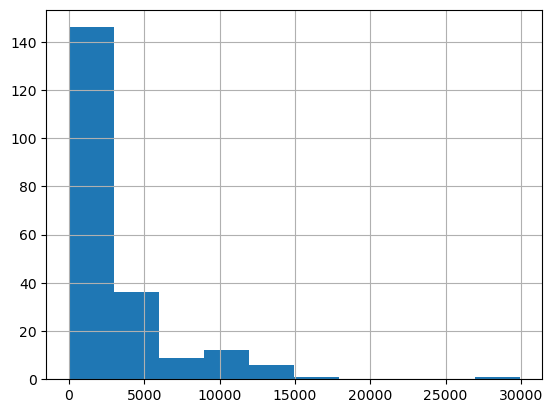

In [24]:
vsdb_targets['Number of Observations'].hist()

In [25]:
vsdb_targets.describe()

,Number of Observations,Number of Observers,Maximum Magnitude,Minimum Magnitude,Range,Valid_nFields
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.0
mean,2840.592417,37.535545,5.554171,7.458246,1.904076,1.0
std,3880.835894,44.502246,1.608215,1.407814,0.972192,0.0
min,2.000000,1.000000,-0.600000,2.800000,1.000000,1.0
25%,275.500000,4.000000,4.800000,6.800000,1.360000,1.0
50%,1649.000000,18.000000,6.000000,7.900000,1.700000,1.0
75%,3769.500000,55.500000,6.700000,8.500000,2.200000,1.0
max,29928.000000,230.000000,8.000000,9.000000,8.800000,1.0


In [28]:
# generate a target list from the 25% least observed variables
vs_target_list = vsdb_targets[vsdb_targets['Number of Observations']<=275]
# although probably better to try filtering on EXISTING baa sequence file first
# then possibly time since last obs?

In [32]:
vs_target_list.drop(columns='Valid_nFields')

,Variable Star,Number of Observations,Number of Observers,First Observation JD / UT,Latest Observation JD / UT,Maximum Magnitude,Minimum Magnitude,Range,VS Constellation
93,ALPHA UMI,3,1,2453716.356000 11 Dec 2005 20:32:38.400000,2454465.519000 31 Dec 2007 00:27:21.600000,0.10,2.80,2.70,umi
189,BETA LEO,67,5,2443571.517000 4 Mar 1978 00:24:28.800000,2458951.469000 11 Apr 2020 23:15:21.600000,1.60,3.00,1.40,leo
227,BM ORI,5,1,2454498.263000 1 Feb 2008 18:18:43.200000,2457421.279000 2 Feb 2016 18:41:45.600000,5.50,8.50,3.00,ori
320,CO AUR,229,5,2442427.437000 14 Jan 1975 22:29:16.800000,2454829.512500 29 Dec 2008 00:18:00.000000,7.30,8.30,1.00,aur
342,CT DEL,69,3,2456710.729000 22 Feb 2014 05:29:45.600000,2458960.615000 21 Apr 2020 02:45:36.000000,6.90,8.20,1.30,del
372,DELTA UMA,217,7,2440420.524000 18 Jul 1969 00:34:33.600000,2459050.417000 19 Jul 2020 22:00:28.800000,2.10,4.40,2.30,uma
384,DK BOO,9,1,2458245.448000 6 May 2018 22:45:07.200000,2459310.347000 5 Apr 2021 20:19:40.800000,7.70,8.70,1.00,boo
392,DN GEM,12,1,2419477.330000 15 Mar 1912 19:55:12.000000,2419540.420000 17 May 1912 22:04:48.000000,4.00,7.20,3.20,gem
443,EK CEP,221,3,2446491.388000 1 Mar 1986 21:18:43.200000,2458961.578000 22 Apr 2020 01:52:19.200000,7.60,8.90,1.30,cep
452,EP Aqr,16,1,2455854.309000 19 Oct 2011 19:24:57.600000,2456272.239000 10 Dec 2012 17:44:09.600000,6.30,7.30,1.00,aqr


In [33]:
vs_target_list.sort_values('VS Constellation')

,Variable Star,Number of Observations,Number of Observers,First Observation JD / UT,Latest Observation JD / UT,Maximum Magnitude,Minimum Magnitude,Range,Valid_nFields,VS Constellation
1895,V1229 Aql,2,1,2440695.626000 19 Apr 1970 03:01:26.400000,2440709.580000 3 May 1970 01:55:12.000000,7.30,8.60,1.30,1,aql
452,EP Aqr,16,1,2455854.309000 19 Oct 2011 19:24:57.600000,2456272.239000 10 Dec 2012 17:44:09.600000,6.30,7.30,1.00,1,aqr
1201,RT AUR,50,5,2440287.326000 6 Mar 1969 19:49:26.400000,2451890.588000 12 Dec 2000 02:06:43.200000,4.90,6.10,1.20,1,aur
699,IU AUR,58,3,2449597.558000 2 Sep 1994 01:23:31.200000,2458482.338800 29 Dec 2018 20:07:52.320000,6.90,9.00,2.10,1,aur
2495,WW AUR,202,6,2443549.312000 9 Feb 1978 19:29:16.800000,2458469.742000 17 Dec 2018 05:48:28.800000,5.40,6.76,1.36,1,aur
2639,ZETA AUR,226,4,2449720.620800 3 Jan 1995 02:53:57.120000,2458917.396000 8 Mar 2020 21:30:14.400000,2.90,4.20,1.30,1,aur
2141,V428 AUR,235,4,2458099.330000 11 Dec 2017 19:55:12.000000,2459906.392000 22 Nov 2022 21:24:28.800000,6.50,8.10,1.60,1,aur
320,CO AUR,229,5,2442427.437000 14 Jan 1975 22:29:16.800000,2454829.512500 29 Dec 2008 00:18:00.000000,7.30,8.30,1.00,1,aur
384,DK BOO,9,1,2458245.448000 6 May 2018 22:45:07.200000,2459310.347000 5 Apr 2021 20:19:40.800000,7.70,8.70,1.00,1,boo
2452,VZ CAM,182,7,2440285.348000 4 Mar 1969 20:21:07.200000,2457626.500000 26 Aug 2016 00:00:00.000000,4.60,5.60,1.00,1,cam


In [37]:
vs_target_list['VS Constellation'].value_counts()

aur    6
cyg    5
umi    3
oph    3
cep    3
del    3
ori    3
mon    2
gem    2
vul    2
peg    2
cas    2
cet    2
tau    1
aql    1
psc    1
lep    1
her    1
cap    1
cma    1
leo    1
per    1
lib    1
com    1
aqr    1
boo    1
uma    1
cam    1
Name: VS Constellation, dtype: int64